In [1]:
# Setup

# common:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

usecols = ['Date', 'TransactionAmount', 'Agent_Name', 'Goods_Category', 'Year', 'Quarter', 'Month'] # specify columns to use
sales = pd.read_csv("Sales.csv", usecols = usecols) # load data

In [2]:
sales.head()

,Date,TransactionAmount,Agent_Name,Goods_Category,Year,Quarter,Month
0,2016-11-01,952200.0,Aakriti Byrraju,Supermarket,2016,4,11
1,2016-11-01,167670.0,Bala Dixit,Novelty Shop,2016,4,11
2,2016-11-01,291456.0,Sara Huiting,Supermarket,2016,4,11
3,2016-11-01,178020.0,Alinne Matos,Computer Store,2016,4,11
4,2016-11-01,106812.0,Ingrida Zeltina,Supermarket,2016,4,11


In [3]:
sales.dtypes

Date                  object
TransactionAmount    float64
Agent_Name            object
Goods_Category        object
Year                   int64
Quarter                int64
Month                  int64
dtype: object

In [4]:
sales['Date']= pd.to_datetime(sales['Date'])
sales.dtypes

Date                 datetime64[ns]
TransactionAmount           float64
Agent_Name                   object
Goods_Category               object
Year                          int64
Quarter                       int64
Month                         int64
dtype: object

In [5]:
#to categorize dataframes by years
sales2016=sales[sales.Year==2016].reset_index(drop=True)
sales2017=sales[sales.Year==2017].reset_index(drop=True)
sales2018=sales[sales.Year==2018].reset_index(drop=True)
sales2019=sales[sales.Year==2019].reset_index(drop=True)
sales2020=sales[sales.Year==2020].reset_index(drop=True)
sales171819=sales[(sales.Year>=2017) & (sales.Year<=2019)].reset_index(drop=True) #this was done to exclude 2016 and 2020 because they do not have sales data throughout the year

In [6]:
def bar_chart(sales_date, feature, year, position):
    sns.set_style('whitegrid') #set some display options
    '''this function takes in, as input, the sales date you would like to view, the column(feature) as(str), the year as (str) for 
    the sake of labeling, and whether you would like to view from the top or bottom. It will visualize, as output, the bar chart 
    of the information you put in'''
    df=sales_date.groupby(feature).TransactionAmount.sum().sort_values(ascending=False).reset_index()
    if position=='highest':
        df = df.head(5)
    elif position=='lowest':
        df = df.tail(5)
    elif position==None:
        df = df
    else:
        raise NameError('Please indicate \'highest\', \'lowest\' or None in the third position argument')
    df.columns=[feature,"sum"] 
    plt.figure(figsize=(13, 5))
    plt.title('Bar Chart for total sales in' + ' ' + year + ' ' + 'according to' + ' ' + feature, fontsize=16)
    ax = sns.barplot(x=feature, y="sum", data=df)

def category_chart(sales_date, feature1, feature2, year): 
    sns.set_style('whitegrid') #set some display options
    '''this function takes in, as input, the sales date you would like to view, the columns(features) as(str), and the year 
    as (str) for the sake of labeling. It will visualize, as output, the side-by-side bar chart of the information you put in'''
    df=sales_date.groupby([feature1, feature2]).TransactionAmount.sum().reset_index()
    df.columns=[feature1, feature2,"sum"]
    plt.figure(figsize=(18, 8))
    plt.title('Bar Chart for total sales in' + ' ' + year + ' ' + 'by' + ' ' + feature1 + ' ' + 'in' + ' ' + feature2 , fontsize=16)
    ax = sns.barplot(x=feature2, y="sum", hue=feature1, data=df)
    
def line_plot(sales_date, year):
    sns.set(style="darkgrid")
    '''this function takes in, as input, the sales date you would like to view, and the year as (str) for the sake of labeling. 
    It will visualize, as output, the sales trend of the year you put in'''
    df=sales_date.groupby("Date").TransactionAmount.sum().reset_index()
    df.columns=["Date","sum"]
    plt.figure(figsize=(15, 6))
    plt.title('Line Plot for sales in' + ' ' + year, fontsize=16)
    ax = sns.lineplot(x="Date", y="sum", data=df)
    
def agents_trend(sales_date, agent_name, year):
    '''this function is specifically made for the sake of viewing the sales trend of an agent in any year you would like to. 
    It takes in, as input, the sales date you would like to view, the agent name as (str), and the year as (str) for the sake 
    of labeling. It will visualize, as output, the sales trend of the agent you would like to view'''
    df=sales_date.groupby("Date").TransactionAmount.sum().reset_index()
    agent=sales_date[sales_date.Agent_Name==agent_name].reset_index(drop=True)
    plt.figure(figsize=(15, 6))
    plt.title('Line Plot for sales made by' + ' ' + agent_name + ' ' + 'in' + ' ' + year, fontsize=16)
    ax = sns.lineplot(x='Date', y="TransactionAmount", data=agent)

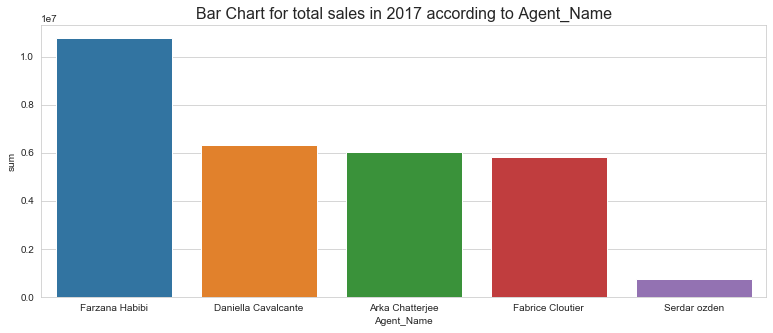

In [7]:
bar_chart(sales2017, 'Agent_Name', '2017', 'lowest')

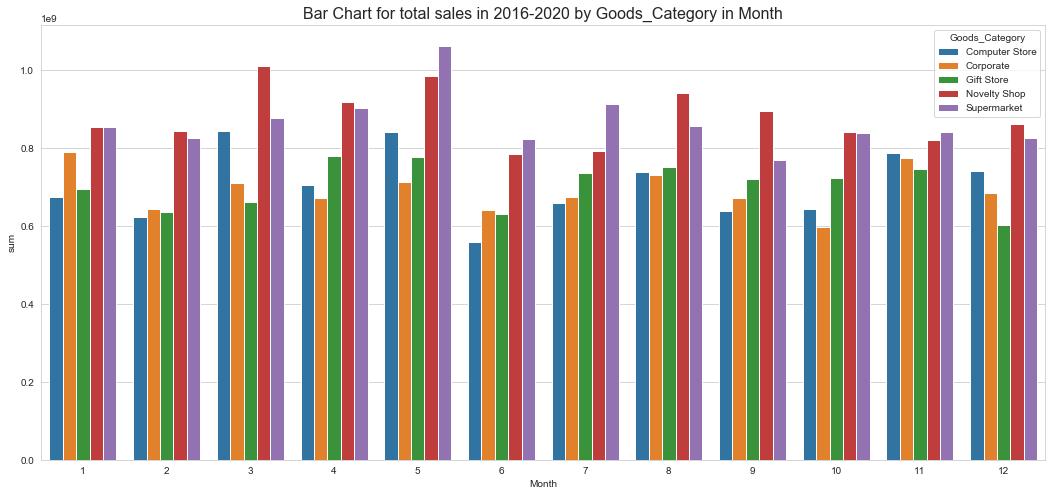

In [8]:
category_chart(sales171819, "Goods_Category","Month", '2016-2020')

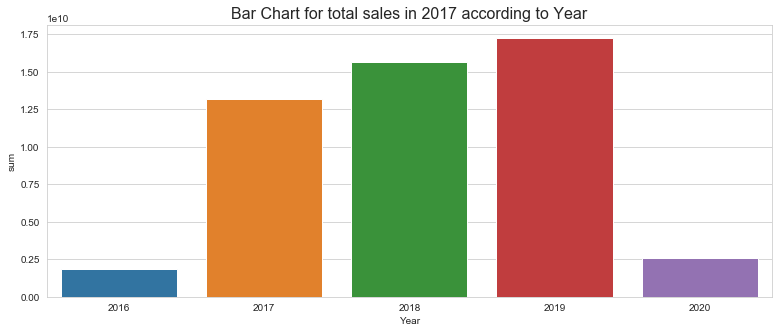

In [9]:
bar_chart(sales, "Year", '2017',  None)

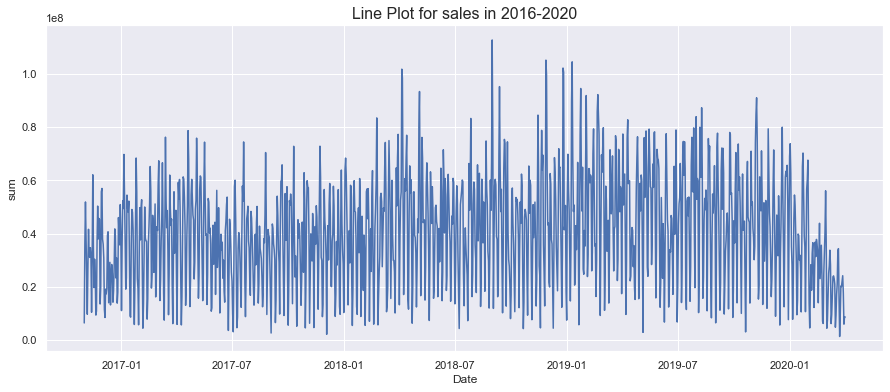

In [10]:
line_plot(sales, '2016-2020')

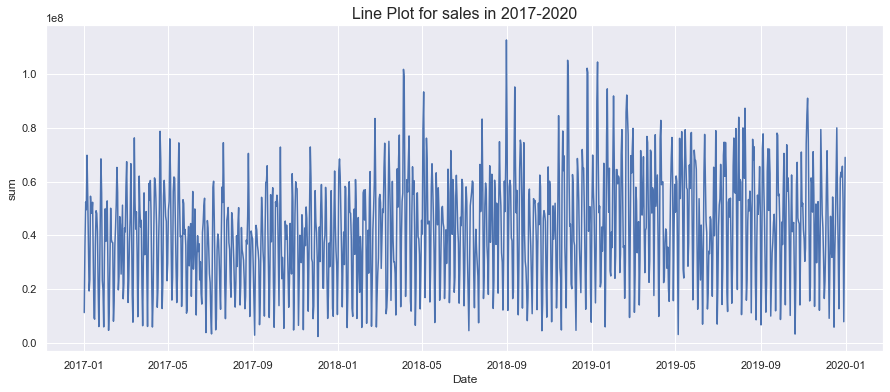

In [11]:
line_plot(sales171819, '2017-2020')

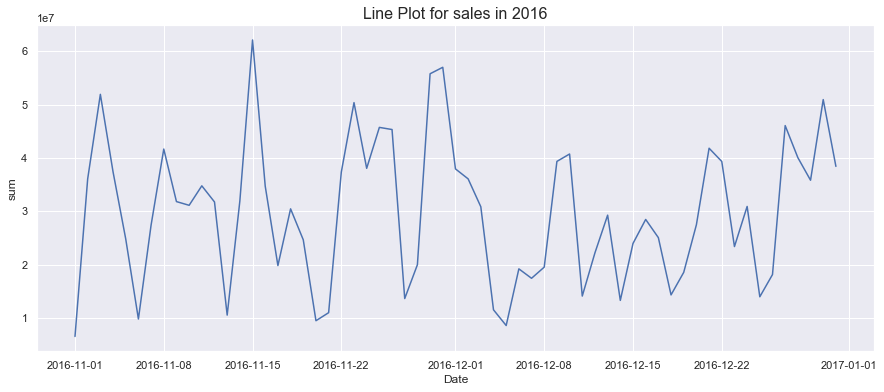

In [12]:
line_plot(sales2016, '2016')

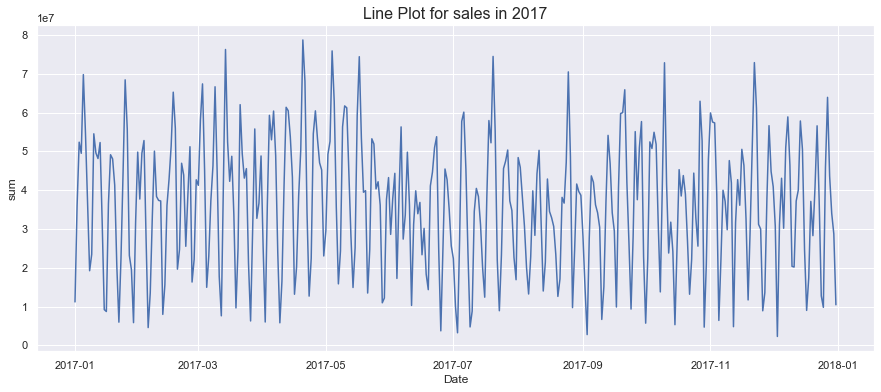

In [13]:
line_plot(sales2017, '2017')

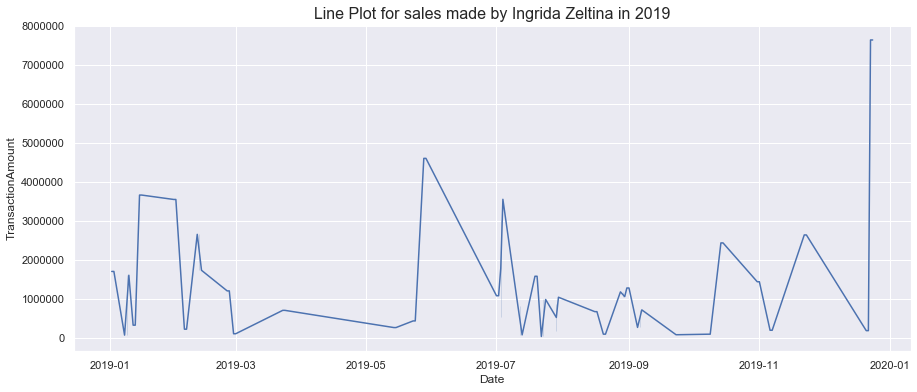

In [14]:
agents_trend(sales2019, 'Ingrida Zeltina', '2019')